In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

# Visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
col_names = ["classification",
             "age" ,
             "menopause" ,
             "tumor-size",
             "inv-nodes",
             "node-caps" ,
             "deg-malig" ,
             "breast" ,
             "breast-quad" ,
             "irradiat"]
feature_names = [ "age" ,
              "menopause" ,
             "tumor-size",
             "inv-nodes",
             "node-caps" ,
             "deg-malig" ,
             "breast" ,
             "breast-quad" ,
             "irradiat"]

In [3]:
ds = pd.read_csv("../Datasets/breast-cancer.data", header=None, names=col_names)

In [4]:
ds.head()

,classification,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
ds["deg-malig"] = ds["deg-malig"].astype('category')

In [6]:
set(ds["menopause"].values)

{'ge40', 'lt40', 'premeno'}

In [8]:
one_hot_feature_names = pd.get_dummies(ds[feature_names]).columns.values
one_hot_feature_names

array(['age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69',
       'age_70-79', 'menopause_ge40', 'menopause_lt40',
       'menopause_premeno', 'tumor-size_0-4', 'tumor-size_10-14',
       'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29',
       'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44',
       'tumor-size_45-49', 'tumor-size_5-9', 'tumor-size_50-54',
       'inv-nodes_0-2', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8',
       'inv-nodes_9-11', 'node-caps_?', 'node-caps_no', 'node-caps_yes',
       'deg-malig_1', 'deg-malig_2', 'deg-malig_3', 'breast_left',
       'breast_right', 'breast-quad_?', 'breast-quad_central',
       'breast-quad_left_low', 'breast-quad_left_up',
       'breast-quad_right_low', 'breast-quad_right_up', 'irradiat_no',
       'irradiat_yes'], dtype=object)

In [9]:
enc = preprocessing.OneHotEncoder()
enc.fit(ds[feature_names])
FEATURES = enc.transform(ds[feature_names]).toarray()

In [10]:
FEATURES

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [11]:
le = preprocessing.LabelEncoder().fit(ds["classification"])

In [12]:
LABELS = le.transform(ds["classification"])

In [13]:
LABELS

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
dt = DecisionTreeClassifier(criterion="entropy")

In [15]:
dt = dt.fit(FEATURES, LABELS)

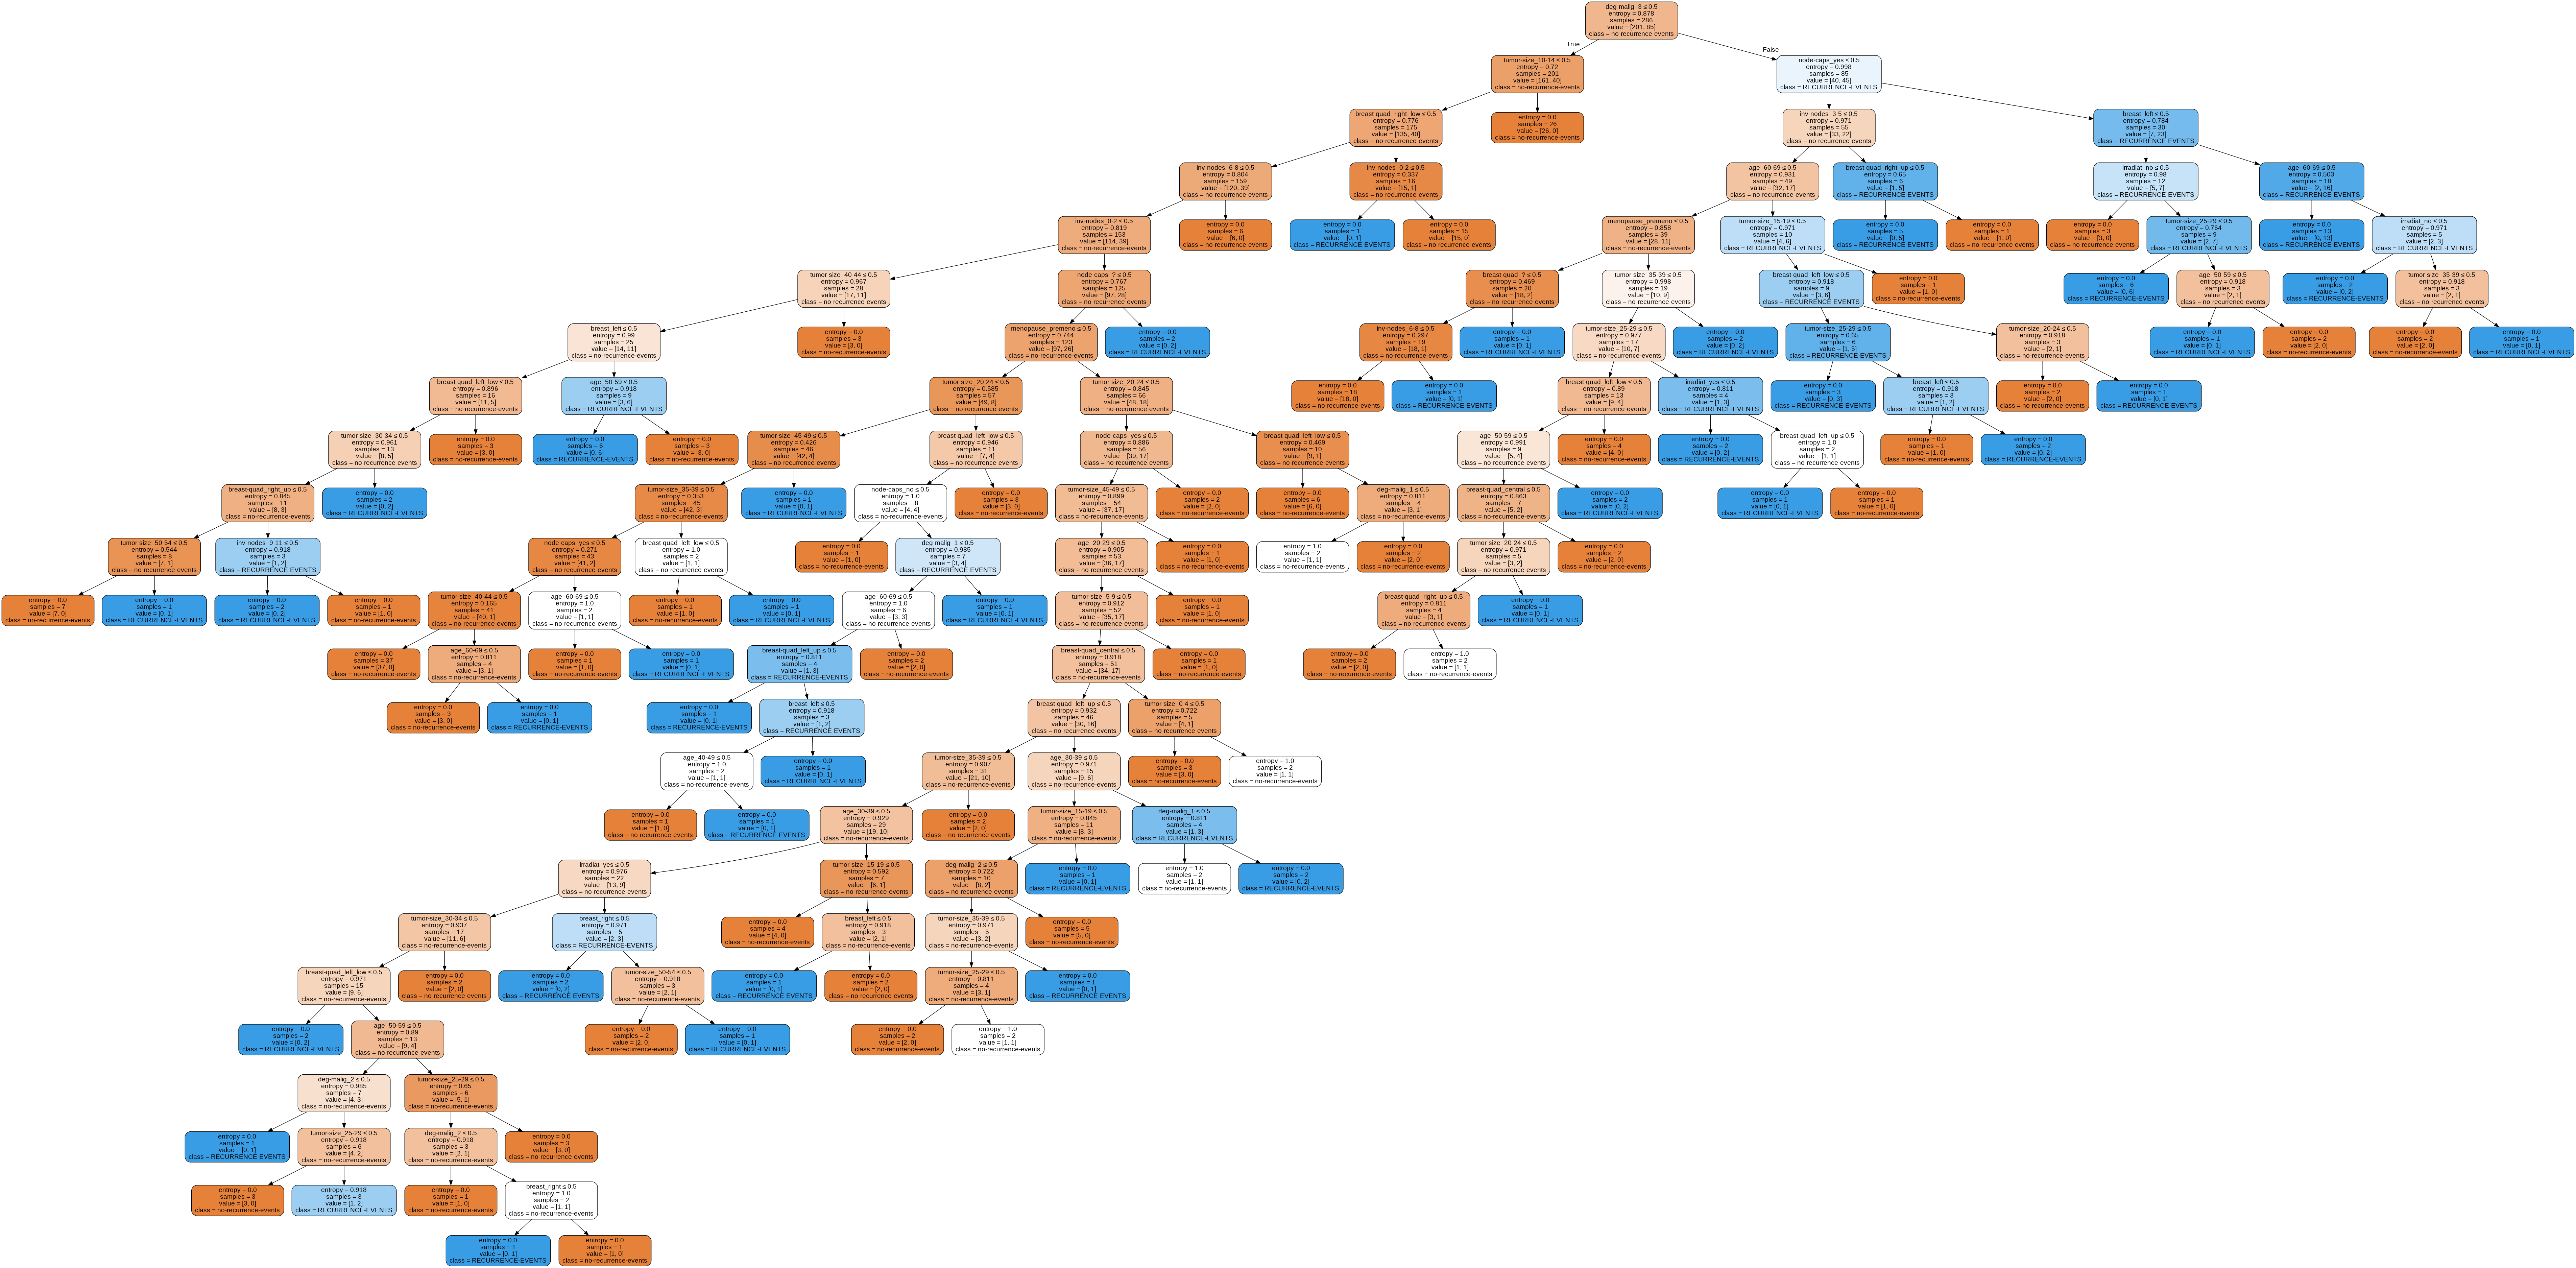

In [16]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = one_hot_feature_names, class_names=["no-recurrence-events", "RECURRENCE-EVENTS"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt.png')
Image(graph.create_png())

In [17]:
unknown_instances  = pd.DataFrame(columns= feature_names )

In [18]:
feature_names

['age',
 'menopause',
 'tumor-size',
 'inv-nodes',
 'node-caps',
 'deg-malig',
 'breast',
 'breast-quad',
 'irradiat']

In [19]:
for att in feature_names:
    print(att)
    print(set(ds[att].values))

age
{'70-79', '50-59', '20-29', '40-49', '60-69', '30-39'}
menopause
{'premeno', 'lt40', 'ge40'}
tumor-size
{'15-19', '0-4', '40-44', '25-29', '20-24', '10-14', '5-9', '45-49', '30-34', '50-54', '35-39'}
inv-nodes
{'3-5', '24-26', '6-8', '0-2', '12-14', '9-11', '15-17'}
node-caps
{'?', 'no', 'yes'}
deg-malig
{1, 2, 3}
breast
{'left', 'right'}
breast-quad
{'left_up', 'right_up', 'right_low', 'central', 'left_low', '?'}
irradiat
{'no', 'yes'}


In [41]:
unknown_instances.loc[0] = ['30-39','lt40','30-34', '12-14', 'no', 2, 'right', 'central','yes'] 
unknown_instances.loc[1] = ['30-39','lt40','40-44', '3-5', 'no', 3, 'right', 'right_up','yes'] 


In [42]:
unknown_instances

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,lt40,30-34,12-14,no,2,right,central,yes
1,30-39,lt40,40-44,3-5,no,3,right,right_up,yes


In [43]:
enc.transform(unknown_instances).toarray()

array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.]])

In [44]:
dt.predict(enc.transform(unknown_instances).toarray())

array([1, 0])

In [46]:
p = le.inverse_transform(dt.predict(enc.transform(unknown_instances).toarray()))

In [47]:
unknown_instances['prediction'] = p

In [48]:
unknown_instances

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,prediction
0,30-39,lt40,30-34,12-14,no,2,right,central,yes,recurrence-events
1,30-39,lt40,40-44,3-5,no,3,right,right_up,yes,no-recurrence-events
